<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1.1
# *Evaluating Classification Models*

In this lab you will be practicing evaluating classification models (Logistic Regression in particular) on a "Breast Cancer" dataset.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 1. Load Data

From UCI's Machine Learning Repository: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/


Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter)
    b) texture (standard deviation of gray-scale values)
    c) perimeter
    d) area
    e) smoothness (local variation in radius lengths)
    f) compactness (perimeter^2 / area - 1.0)
    g) concavity (severity of concave portions of the contour)
    h) concave points (number of concave portions of the contour)
    i) symmetry
    j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [8]:
breast_cancer_csv = pd.read_csv(r'/Users/annaxu/Documents/Data Science/DATA/breast-cancer-wisconsin-data.csv', index_col=0)

### 2. EDA

Explore dataset. Check for nulls. Make the target column binary.

In [10]:
breast_cancer_csv.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [13]:
breast_cancer_csv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [16]:
breast_cancer_csv.duplicated().sum()

0

In [18]:
breast_cancer_csv.drop(columns = 'Unnamed: 32', inplace = True)
breast_cancer_csv.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
breast_cancer_csv['diagnosis'].replace(('M', 'B'), (1, 0), inplace=True)
breast_cancer_csv['diagnosis'].value_counts()

/var/folders/sp/g7sxk3ks3l53htnh17p_16sw0000gn/T/ipykernel_87887/3456187439.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  breast_cancer_csv['diagnosis'].replace(('M', 'B'), (1, 0), inplace=True)
/var/folders/sp/g7sxk3ks3l53htnh17p_16sw0000gn/T/ipykernel_87887/3456187439.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_s

diagnosis
0    357
1    212
Name: count, dtype: int64

In [22]:
breast_cancer_csv.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


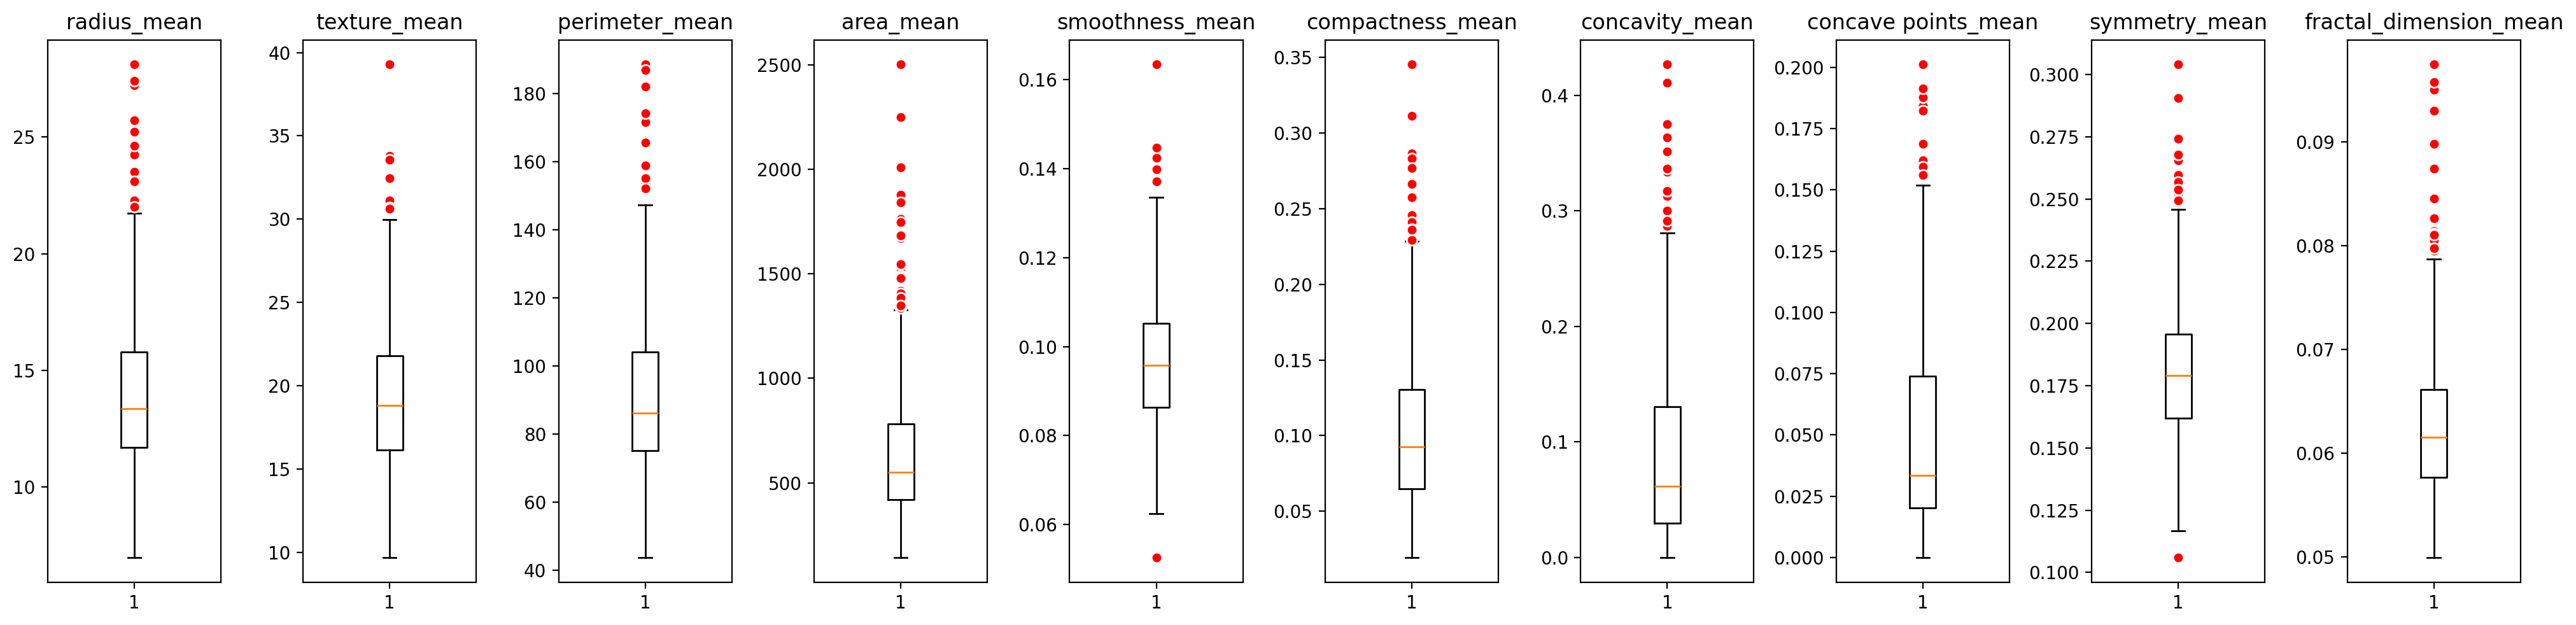

In [24]:
subset1 = breast_cancer_csv.select_dtypes(include='number').iloc[:, 1:11]

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, subset1.shape[1], figsize = (20,5))
 
for i, ax in enumerate(axs.flat):
    ax.boxplot(subset1.iloc[:, i], flierprops = red_circle)
    ax.set_title(subset1.columns[i])
    ax.tick_params(axis='y')

plt.tight_layout()
plt.show()

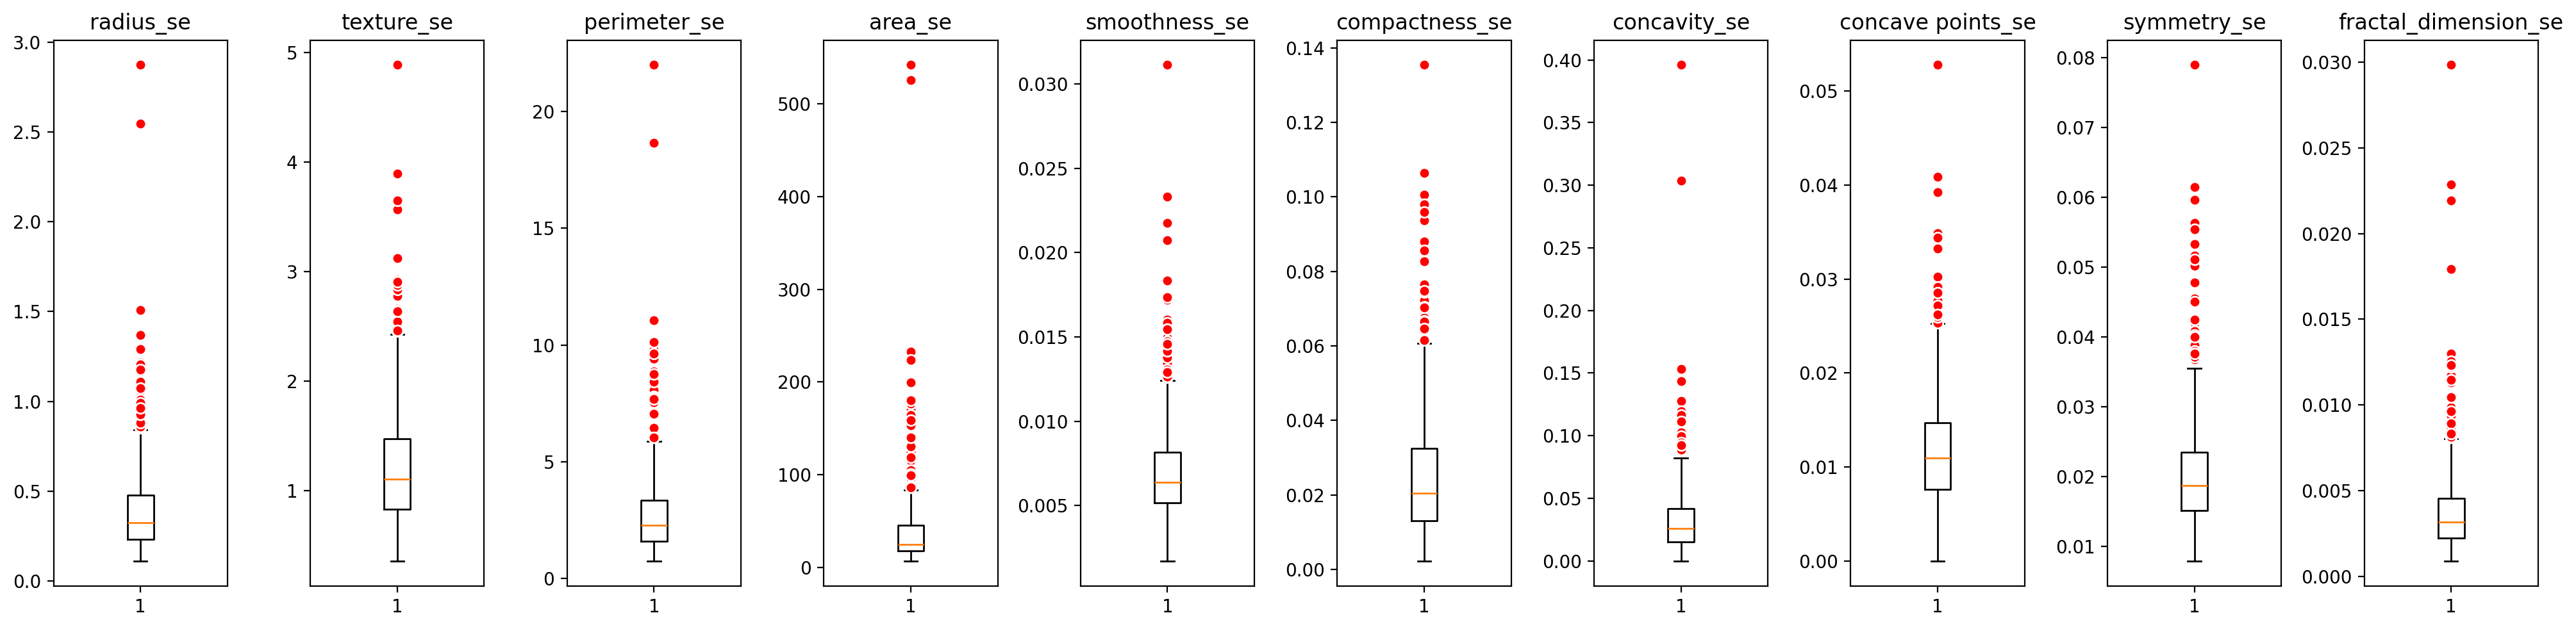

In [25]:
subset2 = breast_cancer_csv.select_dtypes(include='number').iloc[:, 11:21]

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, subset2.shape[1], figsize = (20,5))
 
for i, ax in enumerate(axs.flat):
    ax.boxplot(subset2.iloc[:, i], flierprops = red_circle)
    ax.set_title(subset2.columns[i])
    ax.tick_params(axis='y')

plt.tight_layout()
plt.show()

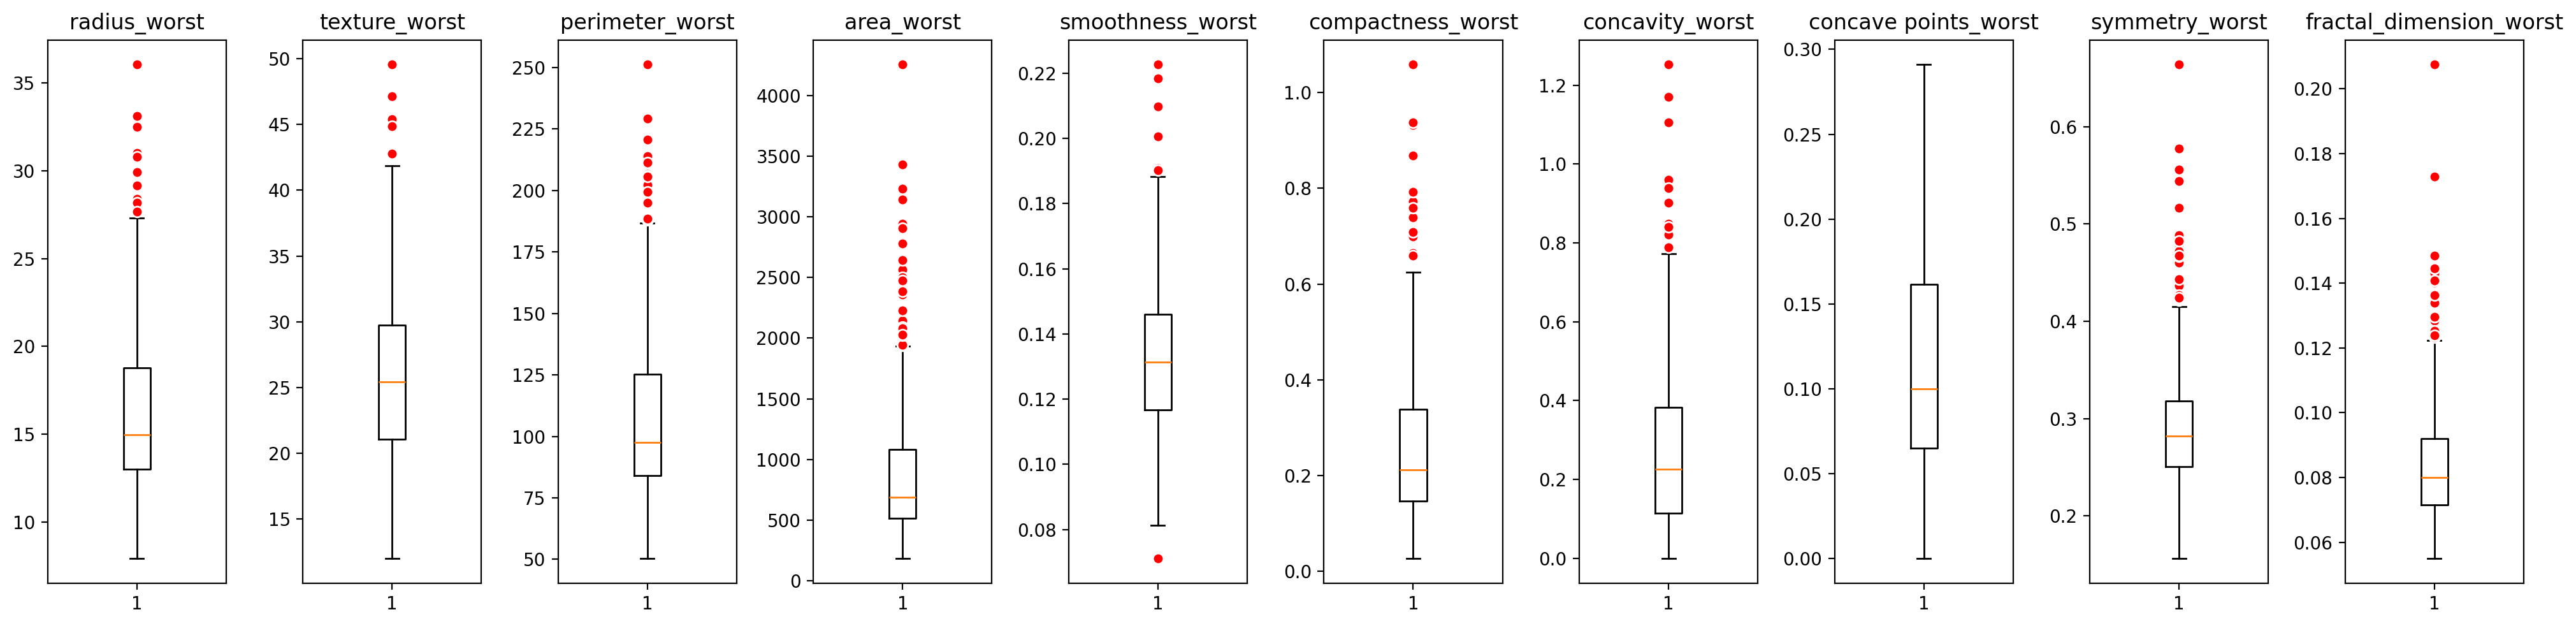

In [26]:
subset3 = breast_cancer_csv.select_dtypes(include='number').iloc[:, 21:31]

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, subset3.shape[1], figsize = (20,5))
 
for i, ax in enumerate(axs.flat):
    ax.boxplot(subset3.iloc[:, i], flierprops = red_circle)
    ax.set_title(subset3.columns[i])
    ax.tick_params(axis='y')

plt.tight_layout()
plt.show()

In [27]:
breast_cancer_csv.nlargest(2, 'radius_se')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
8810703,1,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
911296202,1,27.42,26.27,186.9,2501.0,0.1084,0.1988,0.3635,0.1689,0.2061,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427


In [29]:
breast_cancer_csv.nlargest(2, 'concavity_se')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
8710441,0,9.731,15.34,63.78,300.2,0.1072,0.1599,0.4108,0.07857,0.2548,...,11.02,19.49,71.04,380.5,0.1292,0.2772,0.8216,0.1571,0.3108,0.1259
859471,0,9.029,17.33,58.79,250.5,0.1066,0.1413,0.3130,0.04375,0.2111,...,10.31,22.65,65.50,324.7,0.1482,0.4365,1.2520,0.1750,0.4228,0.1175


In [30]:
breast_cancer_csv.nlargest(1, 'smoothness_se')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
881094802,1,17.42,25.56,114.5,948.0,0.1006,0.1146,0.1682,0.06597,0.1308,...,18.07,28.07,120.4,1021.0,0.1243,0.1793,0.2803,0.1099,0.1603,0.06818


In [31]:
breast_cancer_csv.nlargest(1, 'compactness_se')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
874858,1,14.22,23.12,94.37,609.9,0.1075,0.2413,0.1981,0.06618,0.2384,...,15.74,37.18,106.4,762.4,0.1533,0.9327,0.8488,0.1772,0.5166,0.1446


In [33]:
breast_cancer_csv.nlargest(1, 'symmetry_se')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
8610862,1,20.18,23.97,143.7,1245.0,0.1286,0.3454,0.3754,0.1604,0.2906,...,23.37,31.72,170.3,1623.0,0.1639,0.6164,0.7681,0.2508,0.544,0.09964


In [34]:
#Remove extreme outliers
breast_cancer_csv.drop([8810703, 911296202, 8710441, 859471, 875099, 873357, 855133], inplace = True)
breast_cancer_csv.shape

(562, 31)

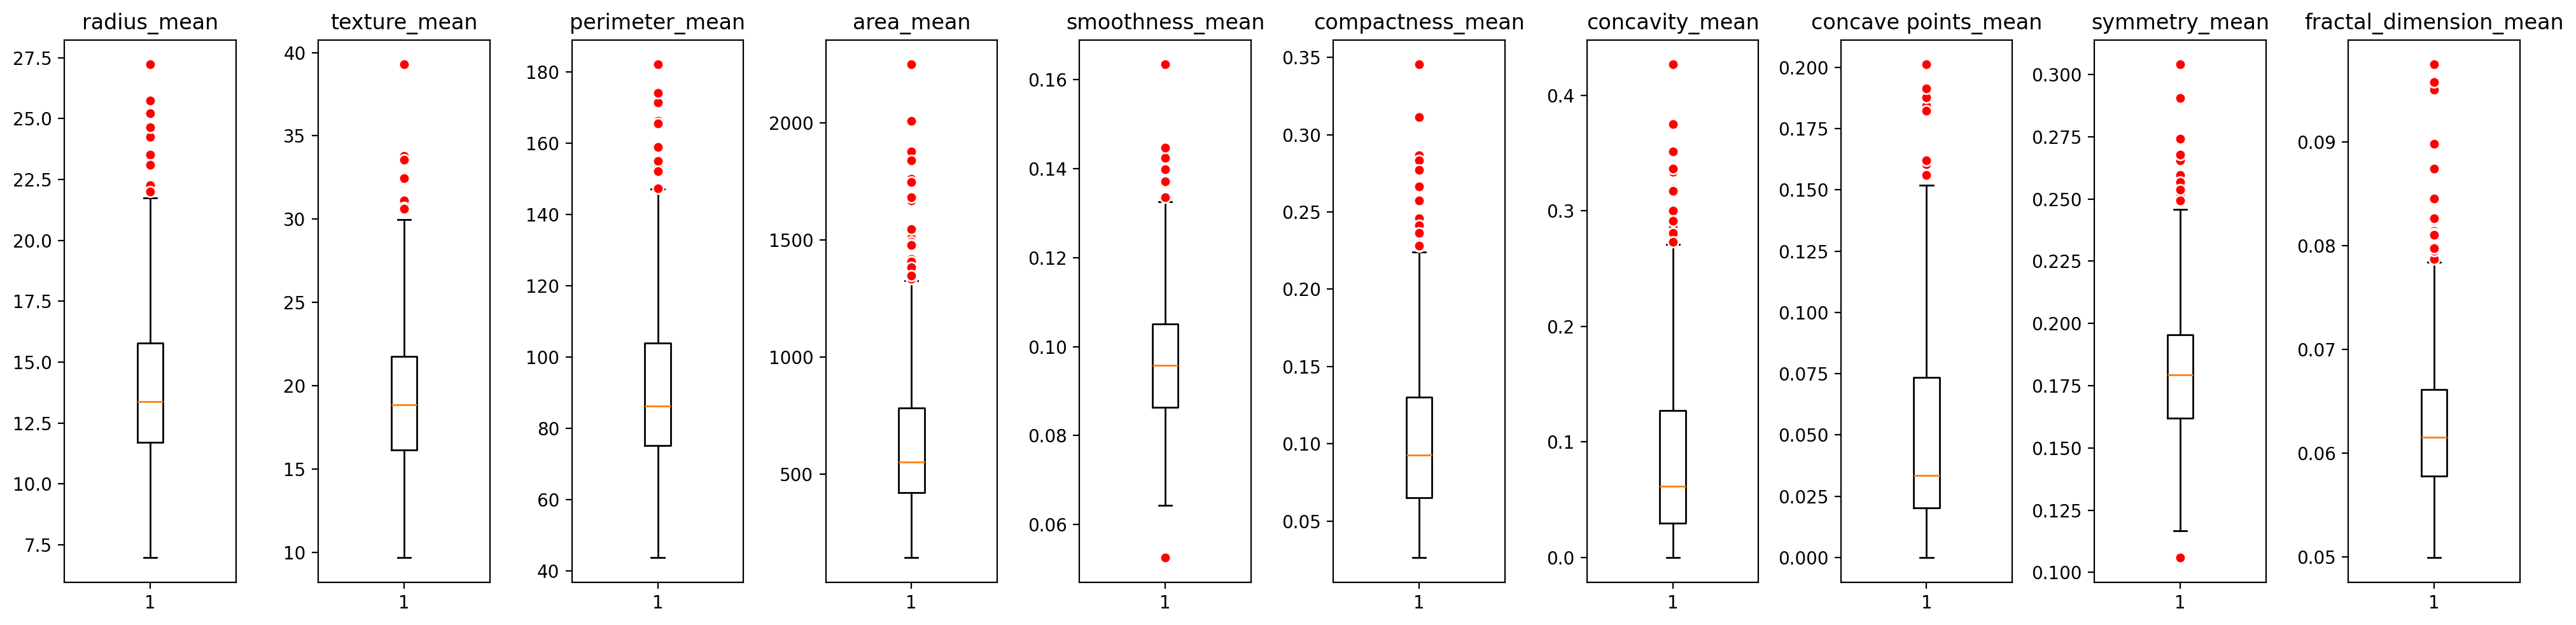

In [37]:
#Check distributions
subset1 = breast_cancer_csv.select_dtypes(include='number').iloc[:, 1:11]

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, subset1.shape[1], figsize = (20,5))
 
for i, ax in enumerate(axs.flat):
    ax.boxplot(subset1.iloc[:, i], flierprops = red_circle)
    ax.set_title(subset1.columns[i])
    ax.tick_params(axis='y')

plt.tight_layout()
plt.show()

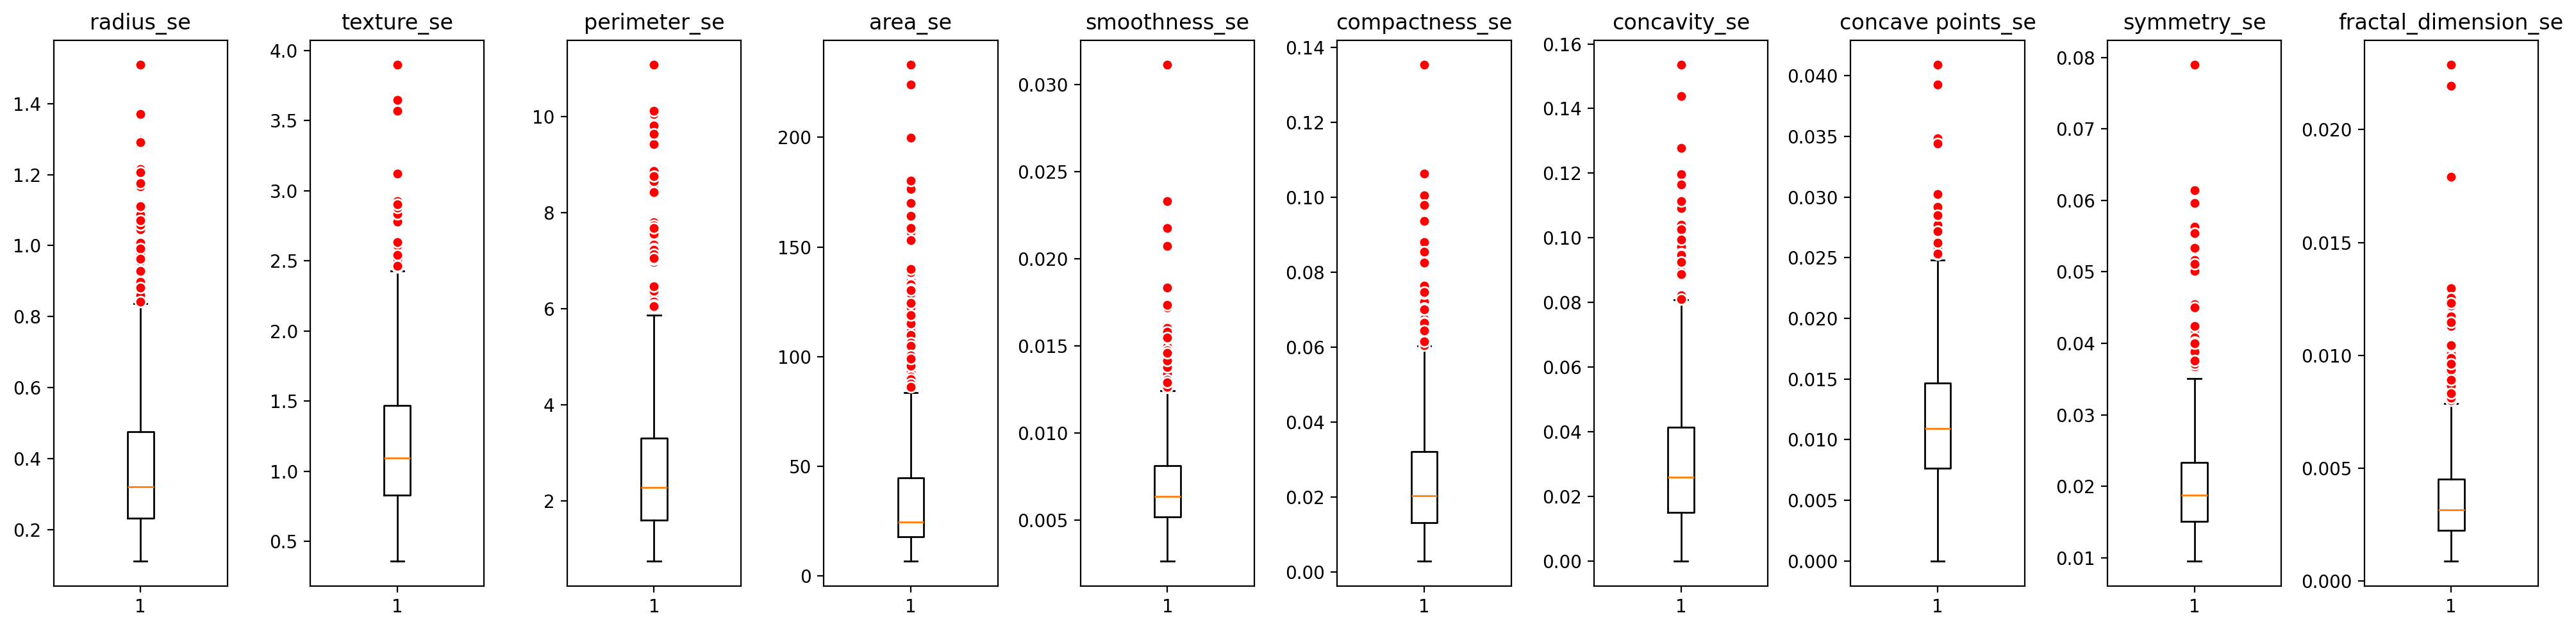

In [43]:
subset2 = breast_cancer_csv.select_dtypes(include='number').iloc[:, 11:21]

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, subset2.shape[1], figsize = (20,5))
 
for i, ax in enumerate(axs.flat):
    ax.boxplot(subset2.iloc[:, i], flierprops = red_circle)
    ax.set_title(subset2.columns[i])
    ax.tick_params(axis='y')

plt.tight_layout()
plt.show()

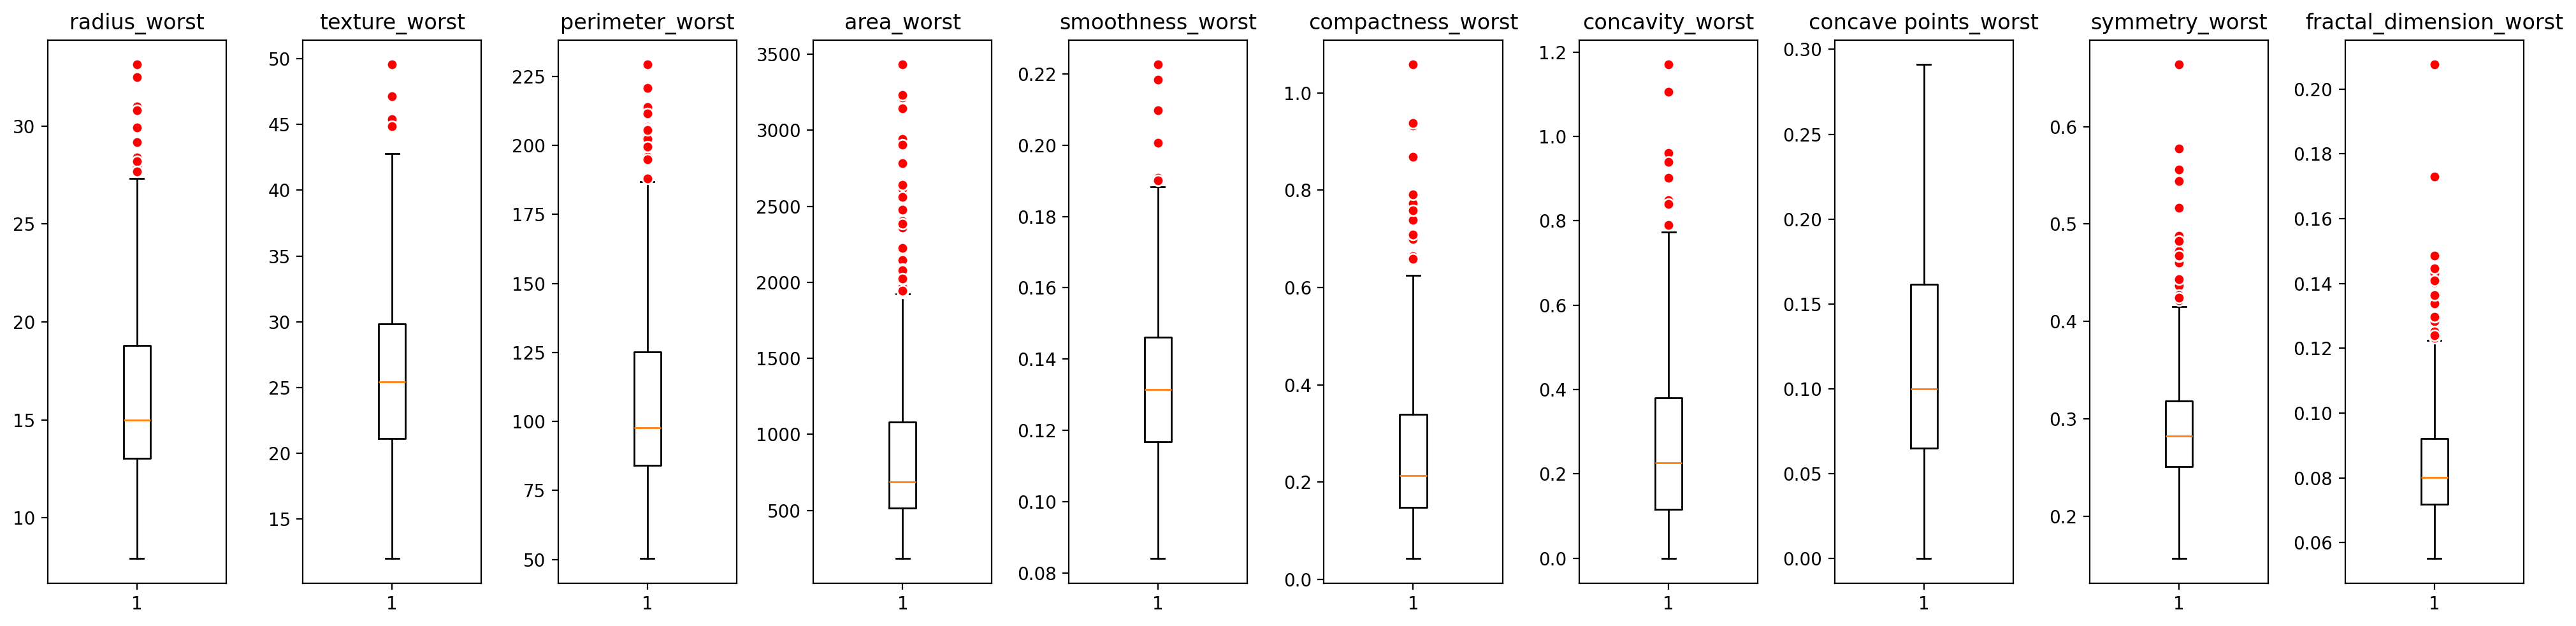

In [44]:
subset3 = breast_cancer_csv.select_dtypes(include='number').iloc[:, 21:31]

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, subset3.shape[1], figsize = (20,5))
 
for i, ax in enumerate(axs.flat):
    ax.boxplot(subset3.iloc[:, i], flierprops = red_circle)
    ax.set_title(subset3.columns[i])
    ax.tick_params(axis='y')

plt.tight_layout()
plt.show()

In [45]:
#Perform transformations
def log_transform(breast_cancer_csv, col):
    for colname in col:
        if (breast_cancer_csv[colname] <= 0).any():
            # If the column is less than or equal to zero, add 1 before log
            breast_cancer_csv[colname] = np.log(breast_cancer_csv[colname] + 1)
        else:
            breast_cancer_csv[colname] = np.log(breast_cancer_csv[colname])

log_transform(breast_cancer_csv,['smoothness_mean', 'texture_worst', 'smoothness_worst'])

In [47]:
def log10_transform(breast_cancer_csv, col):
    for colname in col:
        if (breast_cancer_csv[colname] <= 0).any():
            # If the column is less than or equal to zero, add 1 before log
            breast_cancer_csv[colname] = np.log10(breast_cancer_csv[colname] + 1)
        else:
            breast_cancer_csv[colname] = np.log10(breast_cancer_csv[colname])

log10_transform(breast_cancer_csv,['radius_mean', 'texture_mean', 'perimeter_mean', 'compactness_mean', 'symmetry_mean', 'compactness_se', 'symmetry_worst', 'radius_worst', 'perimeter_worst', 'compactness_worst', 'concavity_worst'])

In [48]:
def inverse_transform(breast_cancer_csv, col):
    for colname in col:
        if (breast_cancer_csv[colname] <= 0).any():
            # If the column is less than or equal to zero, add 1 before inverse
            breast_cancer_csv[colname] = 1 / (breast_cancer_csv[colname] + 1)
        else:
            breast_cancer_csv[colname] = 1 / breast_cancer_csv[colname]

inverse_transform(breast_cancer_csv,['radius_se', 'perimeter_se', 'smoothness_se', 'symmetry_se', 'fractal_dimension_worst'])

In [49]:
def square_root_transform(breast_cancer_csv, col):
    for colname in col:
        breast_cancer_csv[colname] = np.sqrt(breast_cancer_csv[colname])

square_root_transform(breast_cancer_csv,['concavity_mean', 'concave points_mean', 'fractal_dimension_mean', 'concave points_se'])

In [51]:
def cube_root_transform(breast_cancer_csv, col):
    for colname in col:
        breast_cancer_csv[colname] = np.cbrt(breast_cancer_csv[colname])

cube_root_transform(breast_cancer_csv,['concavity_se', 'area_mean', 'area_se', 'texture_se', 'area_worst', 'fractal_dimension_se'])

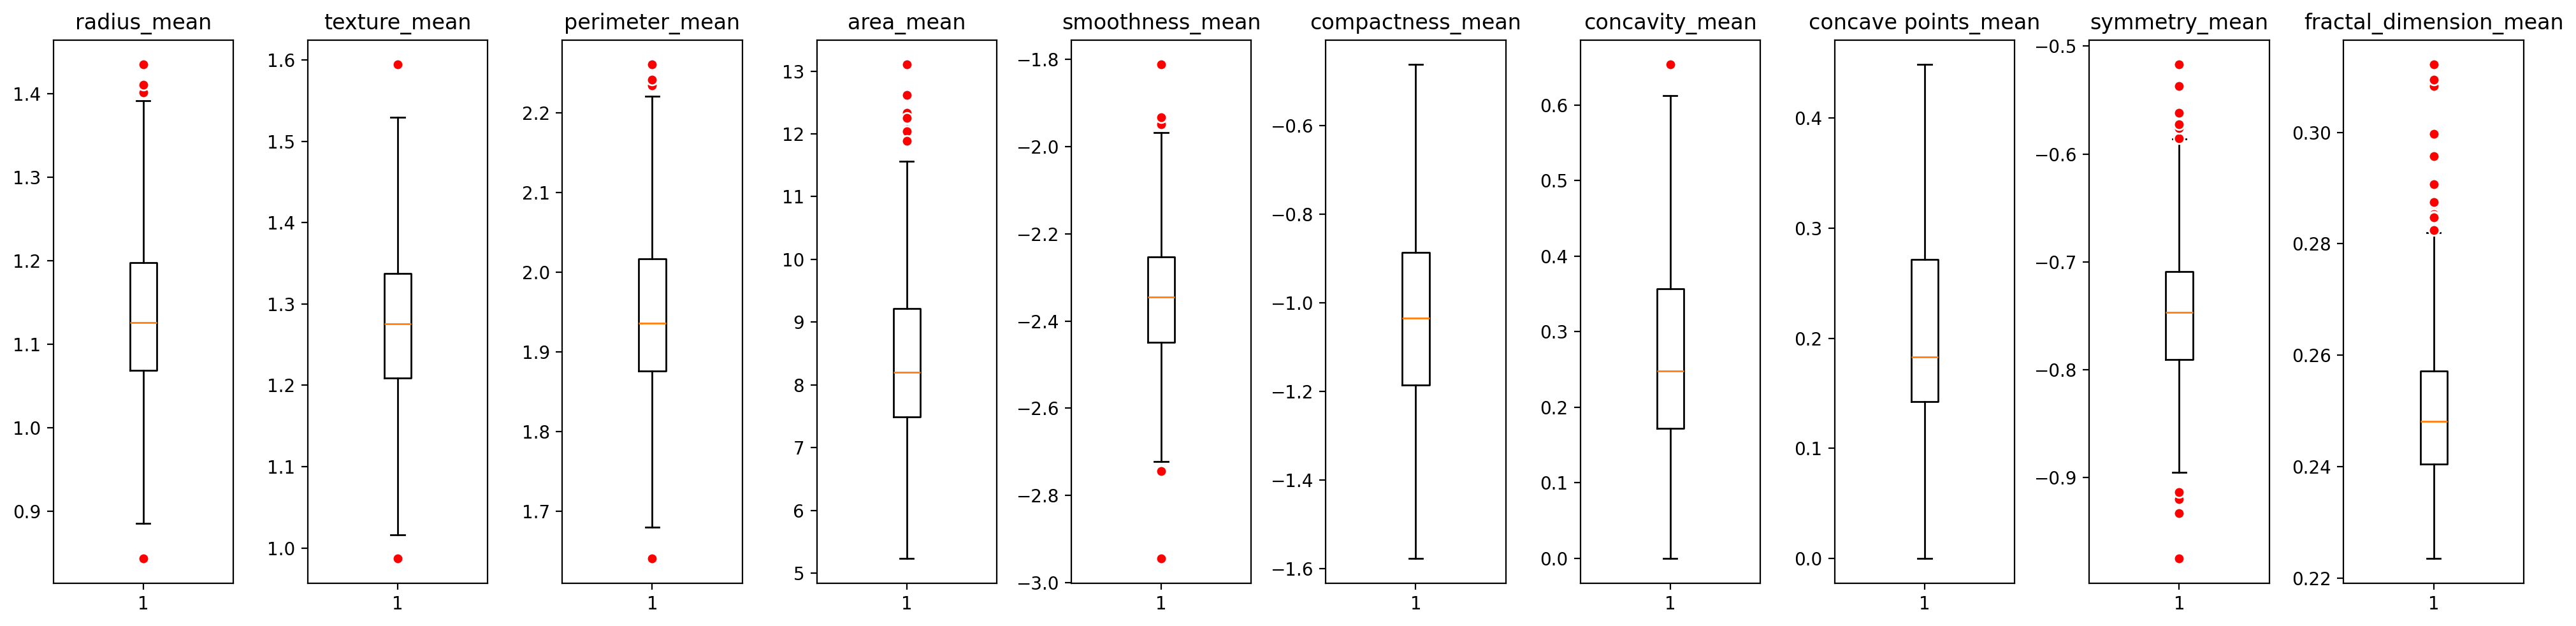

In [58]:
#Check new distributions
subset1 = breast_cancer_csv.select_dtypes(include='number').iloc[:, 1:11]

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, subset1.shape[1], figsize = (20,5))
 
for i, ax in enumerate(axs.flat):
    ax.boxplot(subset1.iloc[:, i], flierprops = red_circle)
    ax.set_title(subset1.columns[i])
    ax.tick_params(axis='y')

plt.tight_layout()
plt.show()

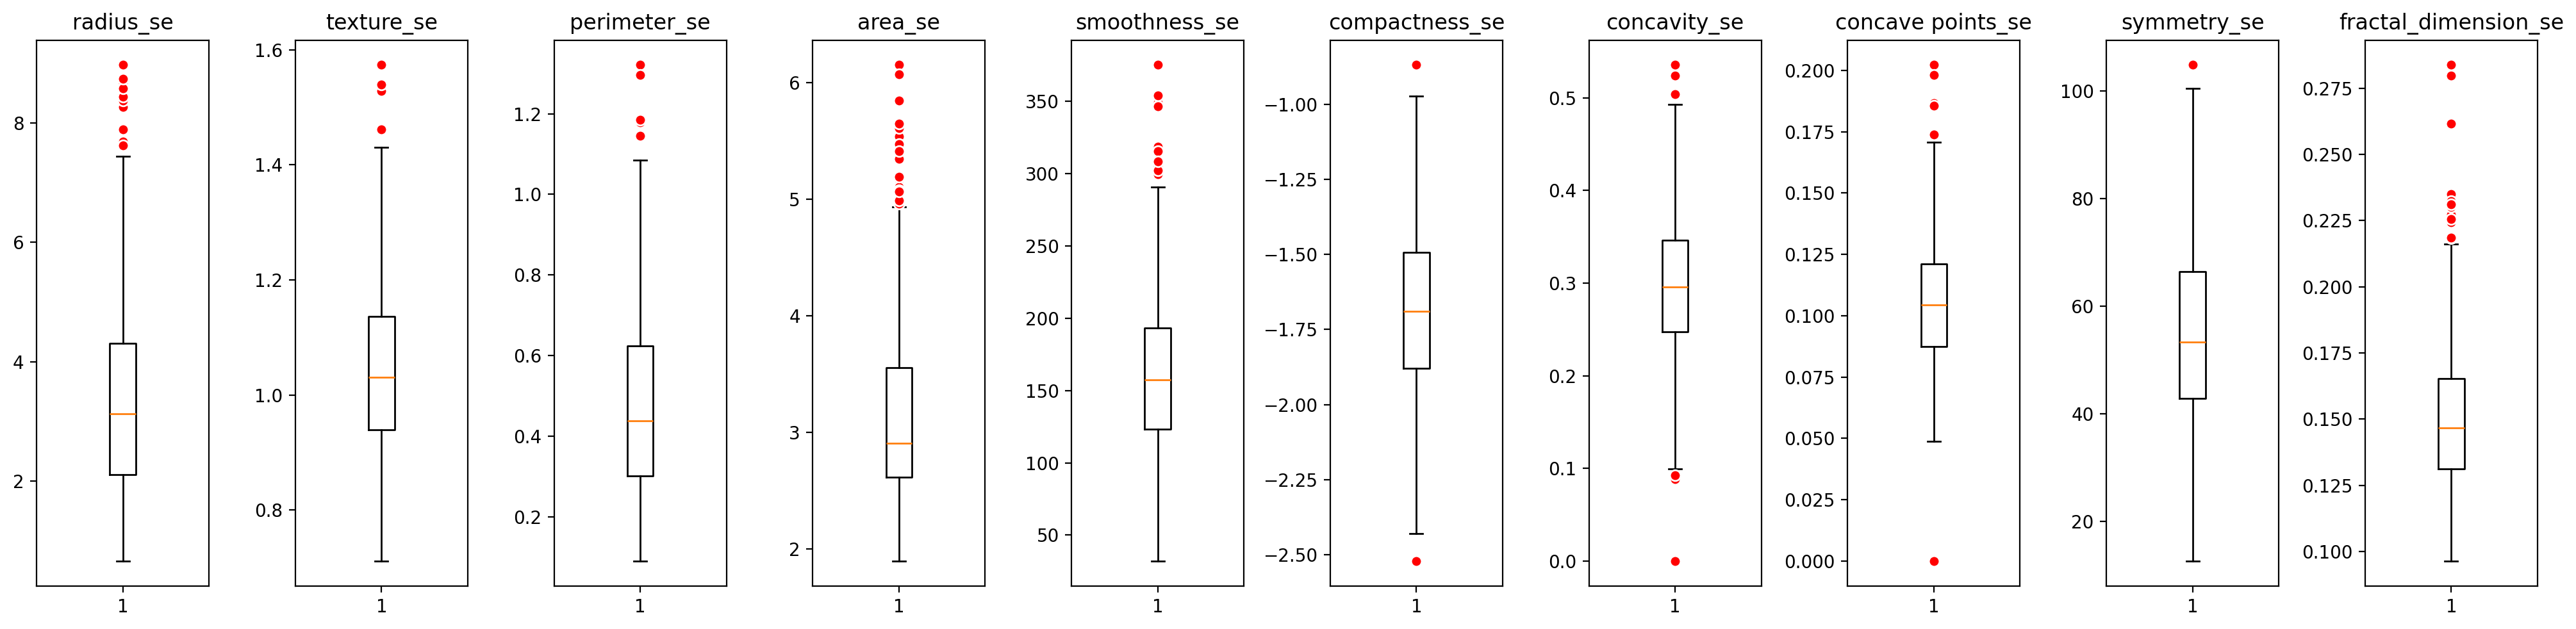

In [59]:
subset2 = breast_cancer_csv.select_dtypes(include='number').iloc[:, 11:21]

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, subset2.shape[1], figsize = (20,5))
 
for i, ax in enumerate(axs.flat):
    ax.boxplot(subset2.iloc[:, i], flierprops = red_circle)
    ax.set_title(subset2.columns[i])
    ax.tick_params(axis='y')

plt.tight_layout()
plt.show()

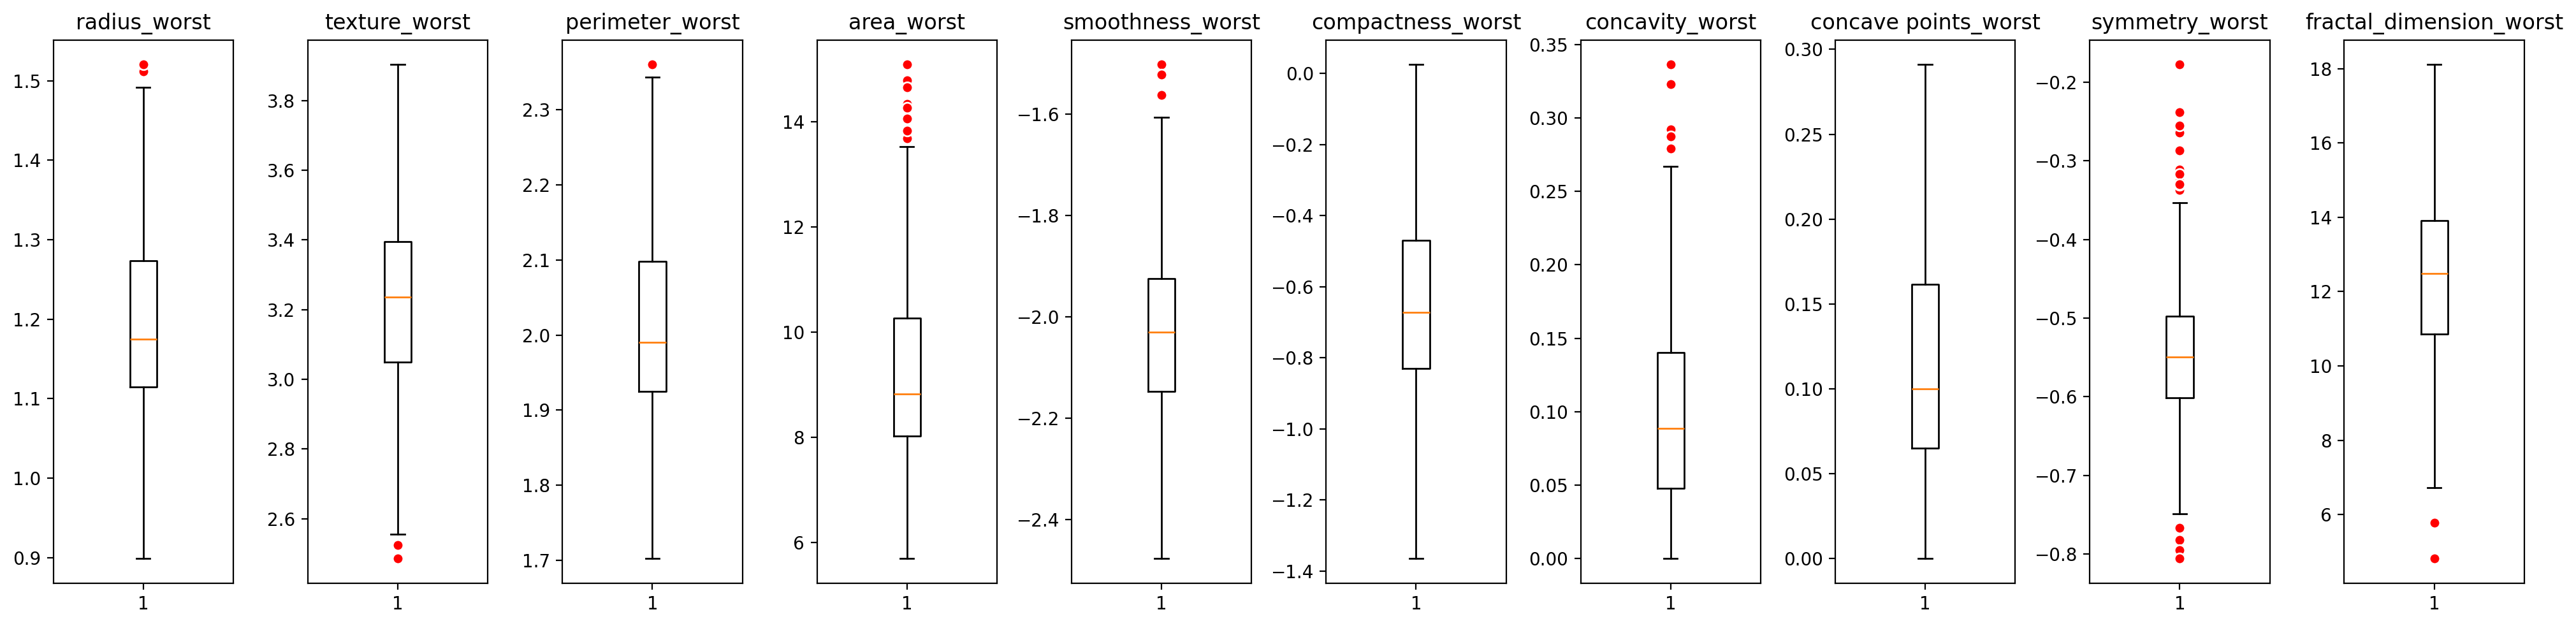

In [60]:
subset3 = breast_cancer_csv.select_dtypes(include='number').iloc[:, 21:31]

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, subset3.shape[1], figsize = (20,5))
 
for i, ax in enumerate(axs.flat):
    ax.boxplot(subset3.iloc[:, i], flierprops = red_circle)
    ax.set_title(subset3.columns[i])
    ax.tick_params(axis='y')

plt.tight_layout()
plt.show()

In [62]:
#Save as a new csv
breast_cancer_csv.to_csv('/Users/annaxu/Documents/Data Science/DATA/breast-cancer-wisconsin-data-Transformed.csv')

### 3. Logistic Regression Model
In this section we fit and then evaluate a logistic regression model using a number of performance metrics.

#### 3.1 Perform a train-test split and fit a logistic regression model to the training set.

In [70]:
X = breast_cancer_csv.loc[:, breast_cancer_csv.columns != 'diagnosis']
y = breast_cancer_csv['diagnosis']

In [83]:
# Perform train-test split (by default, split is 80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
# Fit a logistic regression model to the training set:
model = LogisticRegression()
model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### 3.2 Calculate the predicted labels and predicted probabilities on the test set.

In [199]:
# predict test class:
y_pred = model.predict(X_test)

# predicted test probability:
y_prob = model.predict_proba(X_test)

#### 3.3 Create the confusion matrix for your classifier's performance on the test set.

Convert confusion_matrix to a dataframe.

    columns=['predicted_healthy', 'predicted_cancer']
    index=['is_healthy', 'is_cancer']

In [102]:
array = metrics.confusion_matrix(y_test, y_pred)
print(array)

[[87  1]
 [ 6 47]]


In [112]:
confusion_matrix = pd.DataFrame(array, columns=['predicted_healthy','predicted_cancer'],
                         index=['is_healthy', 'is_cancer'])
print(confusion_matrix)

            predicted_healthy  predicted_cancer
is_healthy                 87                 1
is_cancer                   6                47


#### 3.4 Calculate Accuracy

**Classification Accuracy:** Overall, how often is the classifier correct?

    (TP + TN) / float(TP + TN + FP + FN)

In [178]:
# use float to perform true division, not integer division
accuracy = (47 + 87) / float(47 + 87 + 1 + 6)
print('Classification accuracy: {:.2%}'.format(accuracy))
print('Check: ' + str(model.score(X_test, y_test)))
print('Check: ' + str(accuracy_score(y_test, y_pred)))

Classification accuracy: 95.04%
Check: 0.950354609929078
Check: 0.950354609929078


#### 3.5 Calculate Classification Error

**Classification Error:** Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

    (FP + FN) / float(TP + TN + FP + FN)

In [181]:
misclassification = (1 + 6) / float(47 + 87 + 1 + 6)
print('Misclassification rate: {:.2%}'.format(misclassification))
print('Check: ' + str(1 - accuracy_score(y_test, y_pred)))

Misclassification rate: 4.96%
Check: 0.049645390070921946


#### 3.6 Calculate Sensitivity

**Sensitivity:** When the actual value is positive, how often is the prediction correct?

Something we want to maximize
How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"
- TP / all positive
    - all positive = TP + FN

    sensitivity = TP / float(FN + TP)

In [185]:
sensitivity = 47 / float(47 + 6)
print('Sensitivity: {:.2%}'.format(sensitivity))
print('Check: ' + str(metrics.recall_score(y_test, y_pred)))

Sensitivity: 88.68%
Check: 0.8867924528301887


#### 3.7 Calculate Specificity

**Specificity:** When the actual value is negative, how often is the prediction correct?

- Something we want to maximize. How "specific" (or "selective") is the classifier in predicting positive instances?
- TN / all negative
    - all negative = TN + FP

    specificity = TN / (TN + FP)

In [191]:
specificity = 87 / float(87 + 1)
print('Specificity: {:.2%}'.format(specificity))

Specificity: 98.86%


#### 3.8 Calculate False Positive Rate

**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

    false_positive_rate = FP / float(TN + FP)

In [189]:
false_positive = 1 / float(87 + 1)
print('False positive rate: {:.2%}'.format(false_positive))
print('Check: ' + str(1 - specificity))

False positive rate: 1.14%
Check: 0.011363636363636354


#### 3.9 Calculate Precision

**Precision:** When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

    precision = TP / float(TP + FP)

In [194]:
precision = 47 / float(47 + 1)
print('Precision: {:.2%}'.format(precision))
print('Check: ' + str(metrics.precision_score(y_test, y_pred)))

Precision: 97.92%
Check: 0.9791666666666666


#### 3.10 Create a predicted test probability dataframe with column names 'class_0_pp','class_1_pp'

In [206]:
# Get the predicted probability vector and explicitly name the columns:
y_prob = model.predict_proba(X_test)
y_pp = pd.DataFrame(y_prob, columns=['class_0_pp','class_1_pp'])
y_pp.head(10)

,class_0_pp,class_1_pp
0,0.940697,0.059303
1,0.990854,0.009146
2,0.999718,0.000282
3,0.666606,0.333394
4,0.986134,0.013866
5,0.950137,0.049863
6,0.999818,0.000182
7,0.999879,0.000121
8,0.001732,0.998268
9,0.982012,0.017988


#### 3.11 The Receiver operating characteristic (ROC) curve

Plot the ROC curve for Class 1

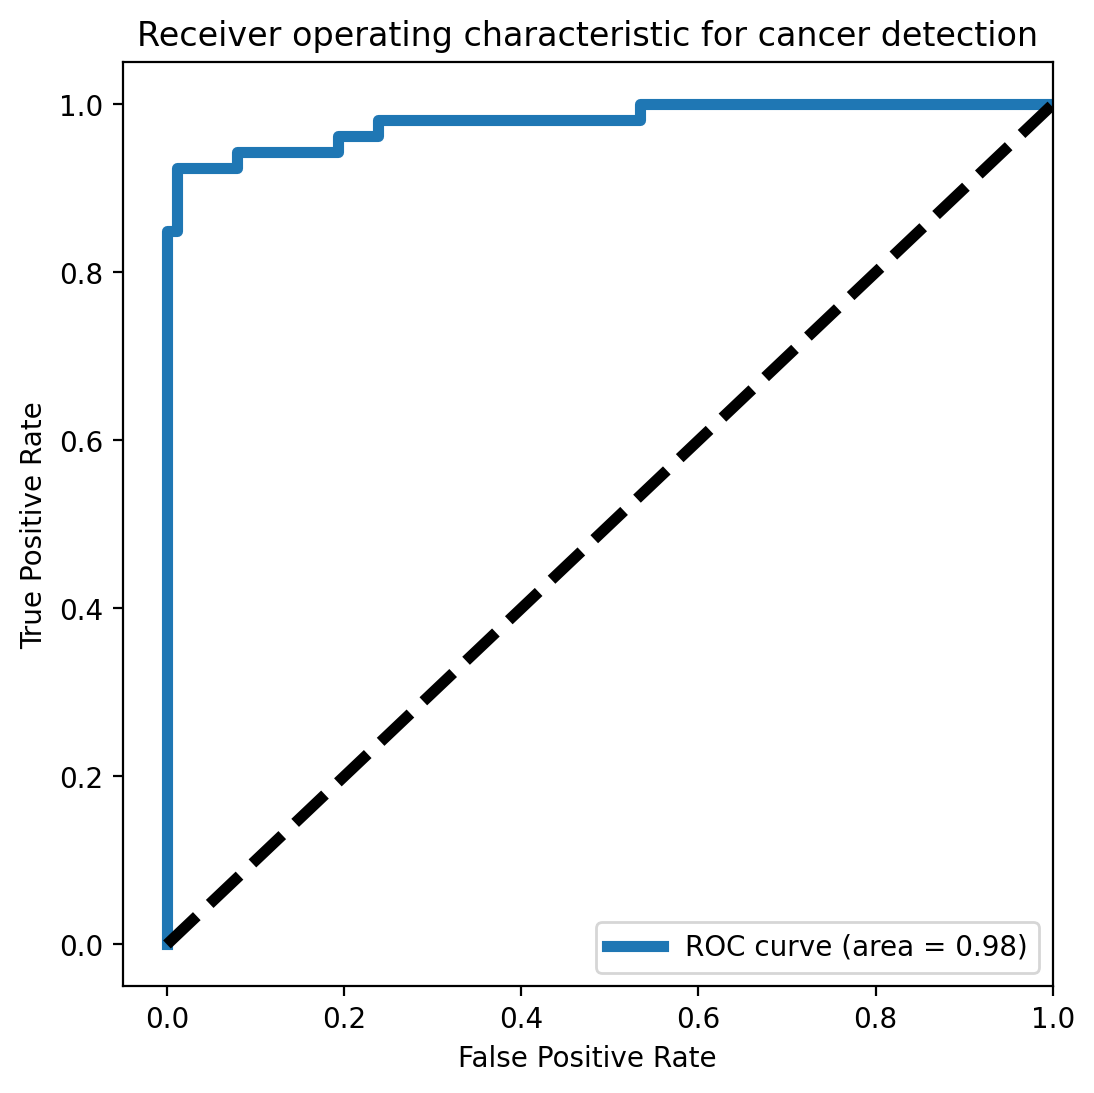

In [226]:
# For class 1, find the area under the curve
# Find fpr, tpr
fpr, tpr, _ = metrics.roc_curve(y_test, y_pp['class_1_pp'])
# Find auc
roc_auc = metrics.auc(fpr,tpr)
# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[6,6])
# Plot fpr, tpr
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for cancer detection')
plt.legend(loc="lower right")
plt.show()

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)



---



---



> > > > > > > > > © 2025 Institute of Data


---



---



